In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import squarify 
%matplotlib inline

In [94]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [95]:
data = pd.read_csv('./data/서울특별시_일반음식점.csv', 
                  encoding = 'cp949',
                  low_memory = False)

In [98]:
set(data.영업상태명[data.영업상태명.str.contains('폐업', na = False)])

{'폐업'}

In [99]:
data_fin = data[(data.영업상태명 == '폐업')]

In [100]:
data_fin = data_fin[['소재지전체주소','위생업태명']]

In [101]:
data_fin.head()

,소재지전체주소,위생업태명
124208,서울특별시 강남구 삼성동 157-18,경양식
124209,서울특별시 강남구 논현동 8-9,경양식
124210,서울특별시 광진구 중곡동 118-34,한식
124211,서울특별시 광진구 구의동 591-22 강변리버빌101호,기타
124212,서울특별시 강남구 압구정동 429 현대백화점본점,한식


In [108]:
res = data_fin.소재지전체주소.str.contains('서울특별시', na = False)
data_seo = data_fin[res]
data_seo.head()

,소재지전체주소,위생업태명
124208,서울특별시 강남구 삼성동 157-18,경양식
124209,서울특별시 강남구 논현동 8-9,경양식
124210,서울특별시 광진구 중곡동 118-34,한식
124211,서울특별시 광진구 구의동 591-22 강변리버빌101호,기타
124212,서울특별시 강남구 압구정동 429 현대백화점본점,한식


In [109]:
addr = data_fin.소재지전체주소.str.slice(start = 6, stop = 9)

In [110]:
addr

124208    강남구
124209    강남구
124210    광진구
124211    광진구
124212    강남구
         ... 
472910    강남구
472911    강남구
472912    강남구
472913    강서구
472914    마포구
Name: 소재지전체주소, Length: 348707, dtype: object

In [111]:
restraunt_cnt = addr.value_counts()

In [112]:
restraunt_cnt

소재지전체주소
강남구    31816
송파구    19763
서초구    18940
영등포    17467
강동구    17006
마포구    16997
동대문    15648
관악구    15599
강서구    14219
구로구    13624
중구     13480
양천구    12947
서대문    12535
성북구    12288
중랑구    12236
강북구    11914
은평구    11855
광진구    11792
종로구    11587
노원구    10731
동작구     9868
금천구     9311
용산구     9186
성동구     9099
도봉구     8640
시 일        2
도 제        1
시 수        1
시 분        1
수영구        1
Name: count, dtype: int64

<Axes: >

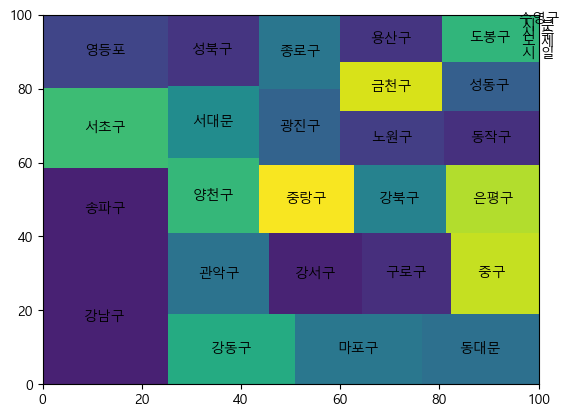

In [113]:
squarify.plot(restraunt_cnt, label = restraunt_cnt.index)